# Compare the performance of models (loss/accuracy, latency)

The models to compare will  be:
* ResNet18
* ResNet50
* VGG16 - Takes a long time to train
* MobileNetV3 - small
* MobileNetV3 - large
* EfficientNet

In [1]:
from pathlib import Path
import pandas as pd

from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from VGGs import *
from MobileNetV3 import *
from engine import *

change_to_disk()
data_dir = Path("new_split_1k/")

In [2]:
data_transform = transforms.Compose([
    # Resize our images to 224x224
    transforms.Resize(size=(224, 224)),
    # Rotate the images randomly (just to make it as independent from the position of the pipeline)
    transforms.RandomRotation(180),
    # Random crop
    transforms.RandomCrop(140),

    #Random horizontal flip
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor(),
    # Normalize
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

BATCH_SIZE = 32
train_dl, validation_dl, test_dl, train_data, validation_data, test_data, class_names = create_dataloaders(data_dir, data_transform, batch_size = BATCH_SIZE)

In [3]:
# Things to play with
# Hyperparameters -> NUM_EPOCHS - 100 | Learning_rate - 0.001 
# Functions -> Optimizer - Rprop | Loss Function - Cross Entropy Loss

NUM_EPOCHS = 10
lr = 0.001
device = get_device()

resnet18 = ResNet18()
resnet50 = ResNet50()
vgg13 = VGG13()
mobnet_sml = MobileNetV3("small")
mobnet_lrg = MobileNetV3("large")

loss_fn = nn.CrossEntropyLoss()

In [4]:
#Train ResNet18
resnet18.to(device)
nadam_optim = torch.optim.NAdam(params=resnet18.parameters(), lr=lr)
train_resnet18_results, train_time_resnet18 = train(resnet18, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7378 | train_acc: 0.6690 | validation_loss: 0.7307 | validation_acc: 0.7352
Epoch: 2 | train_loss: 0.5529 | train_acc: 0.7498 | validation_loss: 1.4767 | validation_acc: 0.5672
Epoch: 3 | train_loss: 0.4737 | train_acc: 0.7865 | validation_loss: 1.8664 | validation_acc: 0.5184
Epoch: 4 | train_loss: 0.4928 | train_acc: 0.7827 | validation_loss: 5.0192 | validation_acc: 0.4609
Epoch: 5 | train_loss: 0.4535 | train_acc: 0.7985 | validation_loss: 0.5325 | validation_acc: 0.7820
Epoch: 6 | train_loss: 0.3945 | train_acc: 0.8250 | validation_loss: 0.9861 | validation_acc: 0.6590
Epoch: 7 | train_loss: 0.3860 | train_acc: 0.8220 | validation_loss: 1.1950 | validation_acc: 0.6555
Epoch: 8 | train_loss: 0.3766 | train_acc: 0.8257 | validation_loss: 2.3564 | validation_acc: 0.5508
Epoch: 9 | train_loss: 0.3864 | train_acc: 0.8283 | validation_loss: 1.7934 | validation_acc: 0.4125
Epoch: 10 | train_loss: 0.3685 | train_acc: 0.8317 | validation_loss: 1.2080 | validation_a

In [10]:
eval_resnet18_results = eval_model(resnet18, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))

  0%|          | 0/16 [00:01<?, ?it/s]

In [5]:
#Train ResNet50
resnet50.to(device)
nadam_optim = torch.optim.NAdam(params=resnet50.parameters(), lr=lr)
train_resnet50_results, train_time_resnet50 = train(resnet50, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8968 | train_acc: 0.6348 | validation_loss: 1.4304 | validation_acc: 0.5652
Epoch: 2 | train_loss: 0.6398 | train_acc: 0.7100 | validation_loss: 1.6563 | validation_acc: 0.4766
Epoch: 3 | train_loss: 0.5218 | train_acc: 0.7552 | validation_loss: 5.1184 | validation_acc: 0.3301
Epoch: 4 | train_loss: 0.5019 | train_acc: 0.7735 | validation_loss: 0.5583 | validation_acc: 0.7723
Epoch: 5 | train_loss: 0.4476 | train_acc: 0.7965 | validation_loss: 2.1043 | validation_acc: 0.5039
Epoch: 6 | train_loss: 0.4183 | train_acc: 0.8183 | validation_loss: 5.6668 | validation_acc: 0.5664
Epoch: 7 | train_loss: 0.4169 | train_acc: 0.8125 | validation_loss: 0.5665 | validation_acc: 0.7781
Epoch: 8 | train_loss: 0.3868 | train_acc: 0.8213 | validation_loss: 0.5283 | validation_acc: 0.7840
Epoch: 9 | train_loss: 0.4179 | train_acc: 0.8175 | validation_loss: 2.5483 | validation_acc: 0.6109
Epoch: 10 | train_loss: 0.3972 | train_acc: 0.8245 | validation_loss: 4.3236 | validation_a

In [11]:
eval_resnet50_results = eval_model(resnet50, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input = torch.rand(32,3,224,224).to(device))

  0%|          | 0/16 [00:01<?, ?it/s]

In [6]:
#Train MobileNet Large
mobnet_lrg.to(device)
nadam_optim = torch.optim.NAdam(params=mobnet_lrg.parameters(), lr=lr)
train_mobnet_lrg_results, train_time_mobnet_lrg = train(mobnet_lrg, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8328 | train_acc: 0.6188 | validation_loss: 1.1486 | validation_acc: 0.5504
Epoch: 2 | train_loss: 0.6448 | train_acc: 0.7023 | validation_loss: 0.9257 | validation_acc: 0.5762
Epoch: 3 | train_loss: 0.5511 | train_acc: 0.7475 | validation_loss: 0.6876 | validation_acc: 0.7266
Epoch: 4 | train_loss: 0.5184 | train_acc: 0.7565 | validation_loss: 0.6467 | validation_acc: 0.7656
Epoch: 5 | train_loss: 0.4478 | train_acc: 0.7983 | validation_loss: 0.8392 | validation_acc: 0.5883
Epoch: 6 | train_loss: 0.4324 | train_acc: 0.7900 | validation_loss: 0.7110 | validation_acc: 0.7371
Epoch: 7 | train_loss: 0.4190 | train_acc: 0.8190 | validation_loss: 0.5902 | validation_acc: 0.7566
Epoch: 8 | train_loss: 0.8868 | train_acc: 0.6753 | validation_loss: 0.7564 | validation_acc: 0.7164
Epoch: 9 | train_loss: 0.5613 | train_acc: 0.7438 | validation_loss: 0.5325 | validation_acc: 0.7496
Epoch: 10 | train_loss: 0.5003 | train_acc: 0.7640 | validation_loss: 0.5989 | validation_a

In [12]:
eval_mobnet_lrg_results = eval_model(mobnet_lrg, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))

  0%|          | 0/16 [00:02<?, ?it/s]

In [7]:
#Train MobileNet Small
mobnet_sml.to(device)
nadam_optim = torch.optim.NAdam(params=mobnet_sml.parameters(), lr=lr)
train_mobnet_sml_results, train_time_mobnet_sml = train(mobnet_sml, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8276 | train_acc: 0.6252 | validation_loss: 0.7130 | validation_acc: 0.6789
Epoch: 2 | train_loss: 0.6271 | train_acc: 0.7275 | validation_loss: 0.7645 | validation_acc: 0.7438
Epoch: 3 | train_loss: 0.5688 | train_acc: 0.7402 | validation_loss: 0.7920 | validation_acc: 0.7156
Epoch: 4 | train_loss: 0.4959 | train_acc: 0.7728 | validation_loss: 0.5381 | validation_acc: 0.7918
Epoch: 5 | train_loss: 0.4739 | train_acc: 0.7817 | validation_loss: 0.5437 | validation_acc: 0.7852
Epoch: 6 | train_loss: 0.4405 | train_acc: 0.7940 | validation_loss: 0.7251 | validation_acc: 0.7430
Epoch: 7 | train_loss: 0.4173 | train_acc: 0.8123 | validation_loss: 0.6386 | validation_acc: 0.6980
Epoch: 8 | train_loss: 0.4341 | train_acc: 0.8010 | validation_loss: 0.5475 | validation_acc: 0.7887
Epoch: 9 | train_loss: 0.4082 | train_acc: 0.8175 | validation_loss: 0.4868 | validation_acc: 0.8141
Epoch: 10 | train_loss: 0.4025 | train_acc: 0.8237 | validation_loss: 0.8997 | validation_a

In [13]:
eval_mobnet_sml_results = eval_model(mobnet_sml, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))

  0%|          | 0/16 [00:01<?, ?it/s]

(None, None)

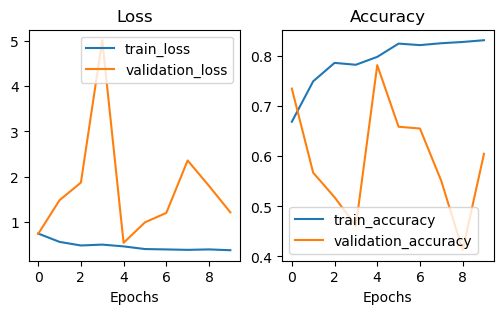

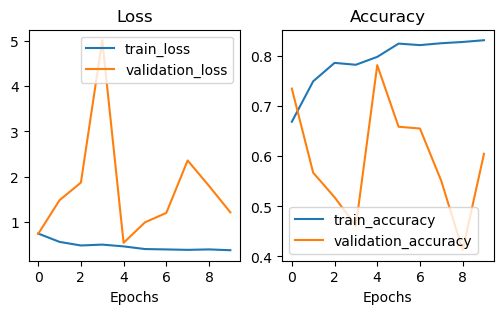

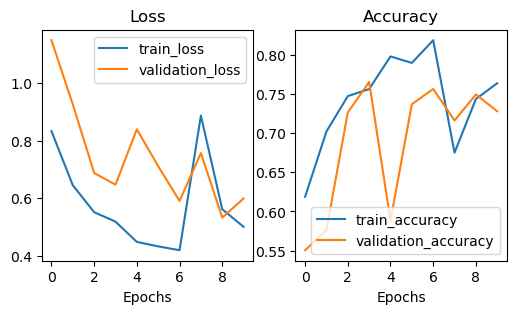

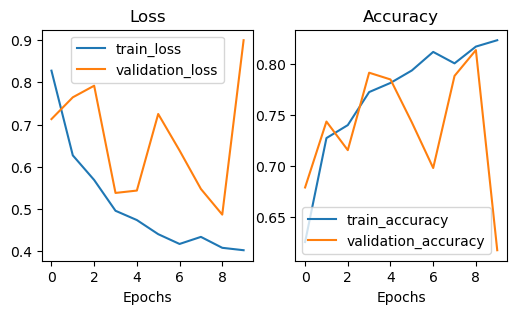

In [8]:
plot_loss_curves(train_resnet18_results,"ResNet18"), plot_loss_curves(train_resnet18_results,"ResNet50"),
plot_loss_curves(train_mobnet_lrg_results,"MobileNet V3 Large"), plot_loss_curves(train_mobnet_sml_results,"MobileNet V3 Small")

(None, None)

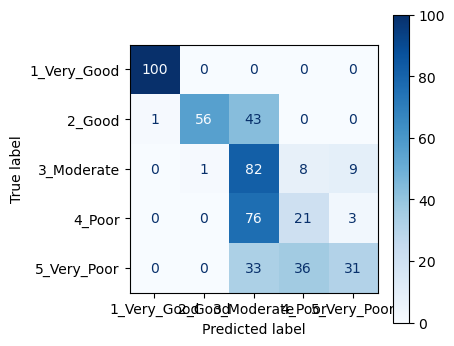

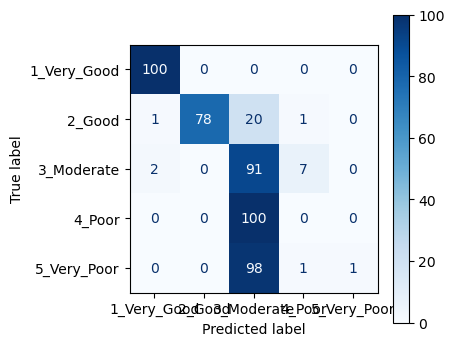

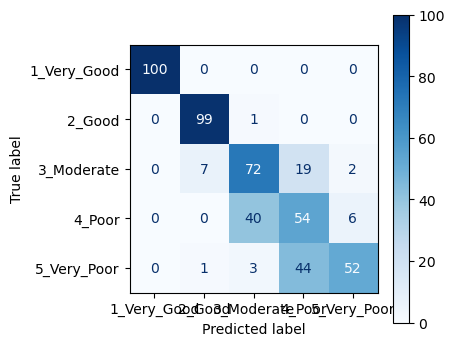

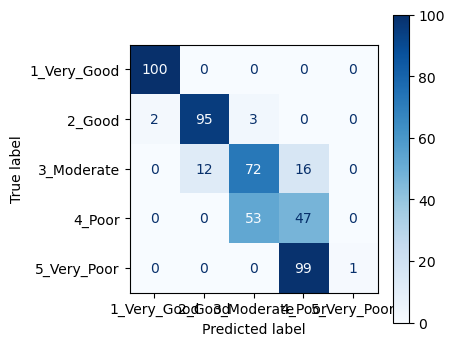

In [9]:
plot_confusion_matrix(resnet18,test_dl,device,class_names), plot_confusion_matrix(resnet50, test_dl, device, class_names),
plot_confusion_matrix(mobnet_lrg, test_dl, device, class_names), plot_confusion_matrix(mobnet_sml, test_dl, device, class_names)